In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
flights=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/flights.csv')
flights=flights.sample(n=100000)
flights.head()

<ipython-input-3-0f966cc6b46e>:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flights=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/flights.csv')


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
4938541,2015,11,5,4,B6,1016,N184JB,FLL,JAX,720,...,823.0,-12.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1215173,2015,3,20,5,WN,209,N719SW,MDW,ATL,1200,...,1435.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1748817,2015,4,22,3,B6,1002,N905JB,FLL,JFK,1130,...,1429.0,-6.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3053856,2015,7,10,5,AA,192,N3LRAA,LAX,BOS,2130,...,537.0,-30.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5669461,2015,12,22,2,MQ,3286,N688MQ,CRP,DFW,800,...,928.0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
flights.shape

(100000, 31)

In [ ]:
flights.isnull().values.any()

True

In [ ]:
flights.isnull().sum()

YEAR                       0
MONTH                      0
DAY                        0
DAY_OF_WEEK                0
AIRLINE                    0
FLIGHT_NUMBER              0
TAIL_NUMBER              239
ORIGIN_AIRPORT             0
DESTINATION_AIRPORT        0
SCHEDULED_DEPARTURE        0
DEPARTURE_TIME          1489
DEPARTURE_DELAY         1489
TAXI_OUT                1534
WHEELS_OFF              1534
SCHEDULED_TIME             0
ELAPSED_TIME            1795
AIR_TIME                1795
DISTANCE                   0
WHEELS_ON               1583
TAXI_IN                 1583
SCHEDULED_ARRIVAL          0
ARRIVAL_TIME            1583
ARRIVAL_DELAY           1795
DIVERTED                   0
CANCELLED                  0
CANCELLATION_REASON    98457
AIR_SYSTEM_DELAY       81647
SECURITY_DELAY         81647
AIRLINE_DELAY          81647
LATE_AIRCRAFT_DELAY    81647
WEATHER_DELAY          81647
dtype: int64

<Axes: xlabel='CANCELLATION_REASON', ylabel='count'>

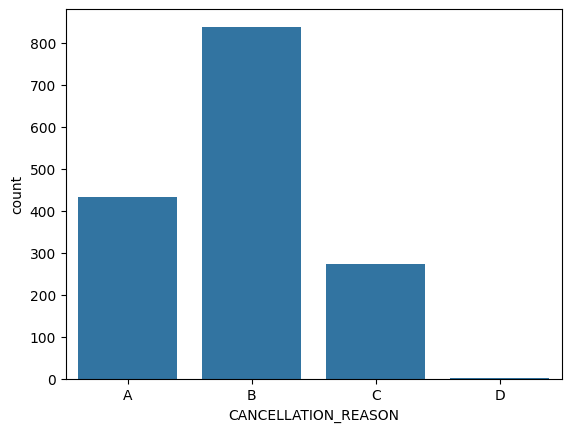

In [ ]:
sns.countplot(x='CANCELLATION_REASON',data=flights)

In [ ]:
#Reason for Cancellation of flight: A - Airline/Carrier; B - Weather; C - National Air System; D - Security

#We can observe from graph easily that mostly weather is responsible for delays of flight.

<Axes: xlabel='MONTH', ylabel='count'>

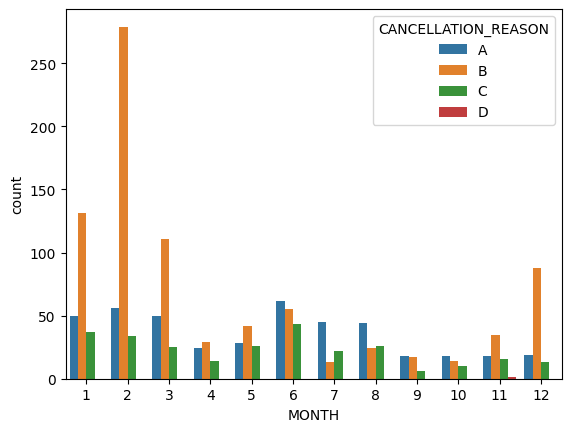

In [ ]:
sns.countplot(x="MONTH",hue="CANCELLATION_REASON",data=flights)

<ipython-input-9-e7b34b0eb7bb>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha="right")


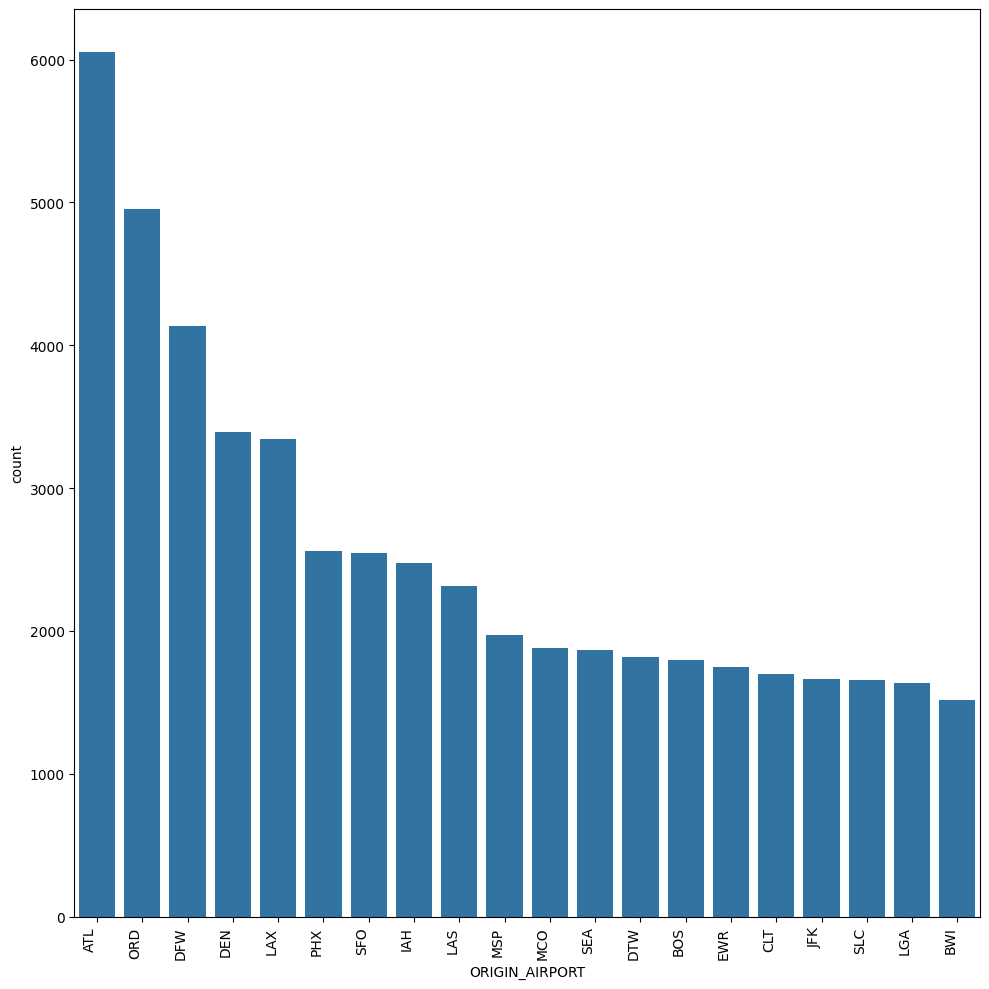

In [ ]:

plt.figure(figsize=(10, 10))
axis = sns.countplot(x=flights['ORIGIN_AIRPORT'], data =flights, order=flights['ORIGIN_AIRPORT'].value_counts().iloc[:20].index)
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

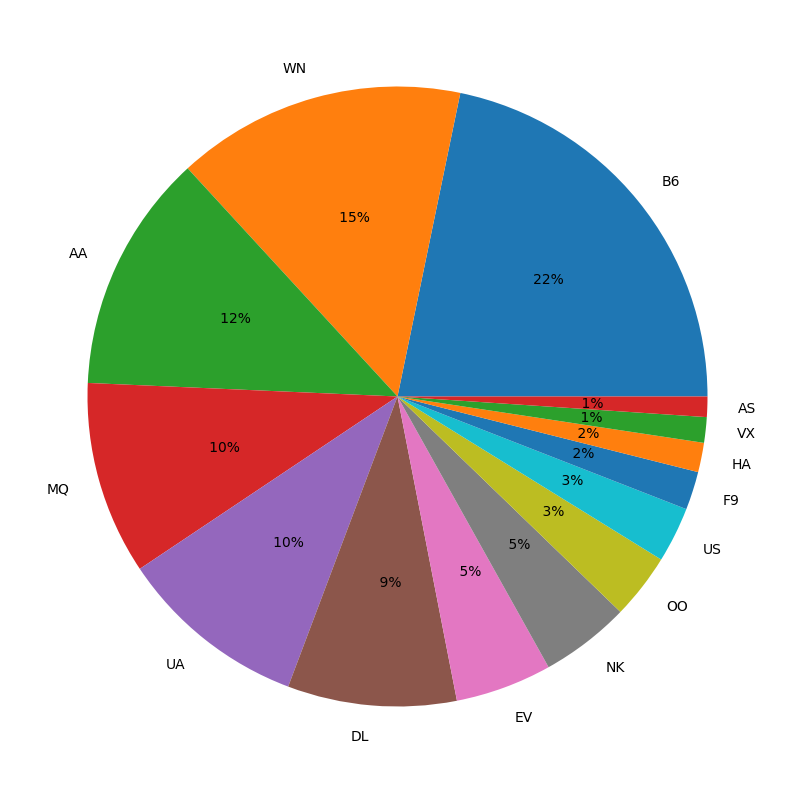

In [ ]:
axis = plt.subplots(figsize=(10,14))
Name = flights["AIRLINE"].unique()
size = flights["AIRLINE"].value_counts()
plt.pie(size,labels=Name,autopct='%5.0f%%')
plt.show()

<ipython-input-11-6b7ac7a3f431>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(flights.corr(),annot = True)


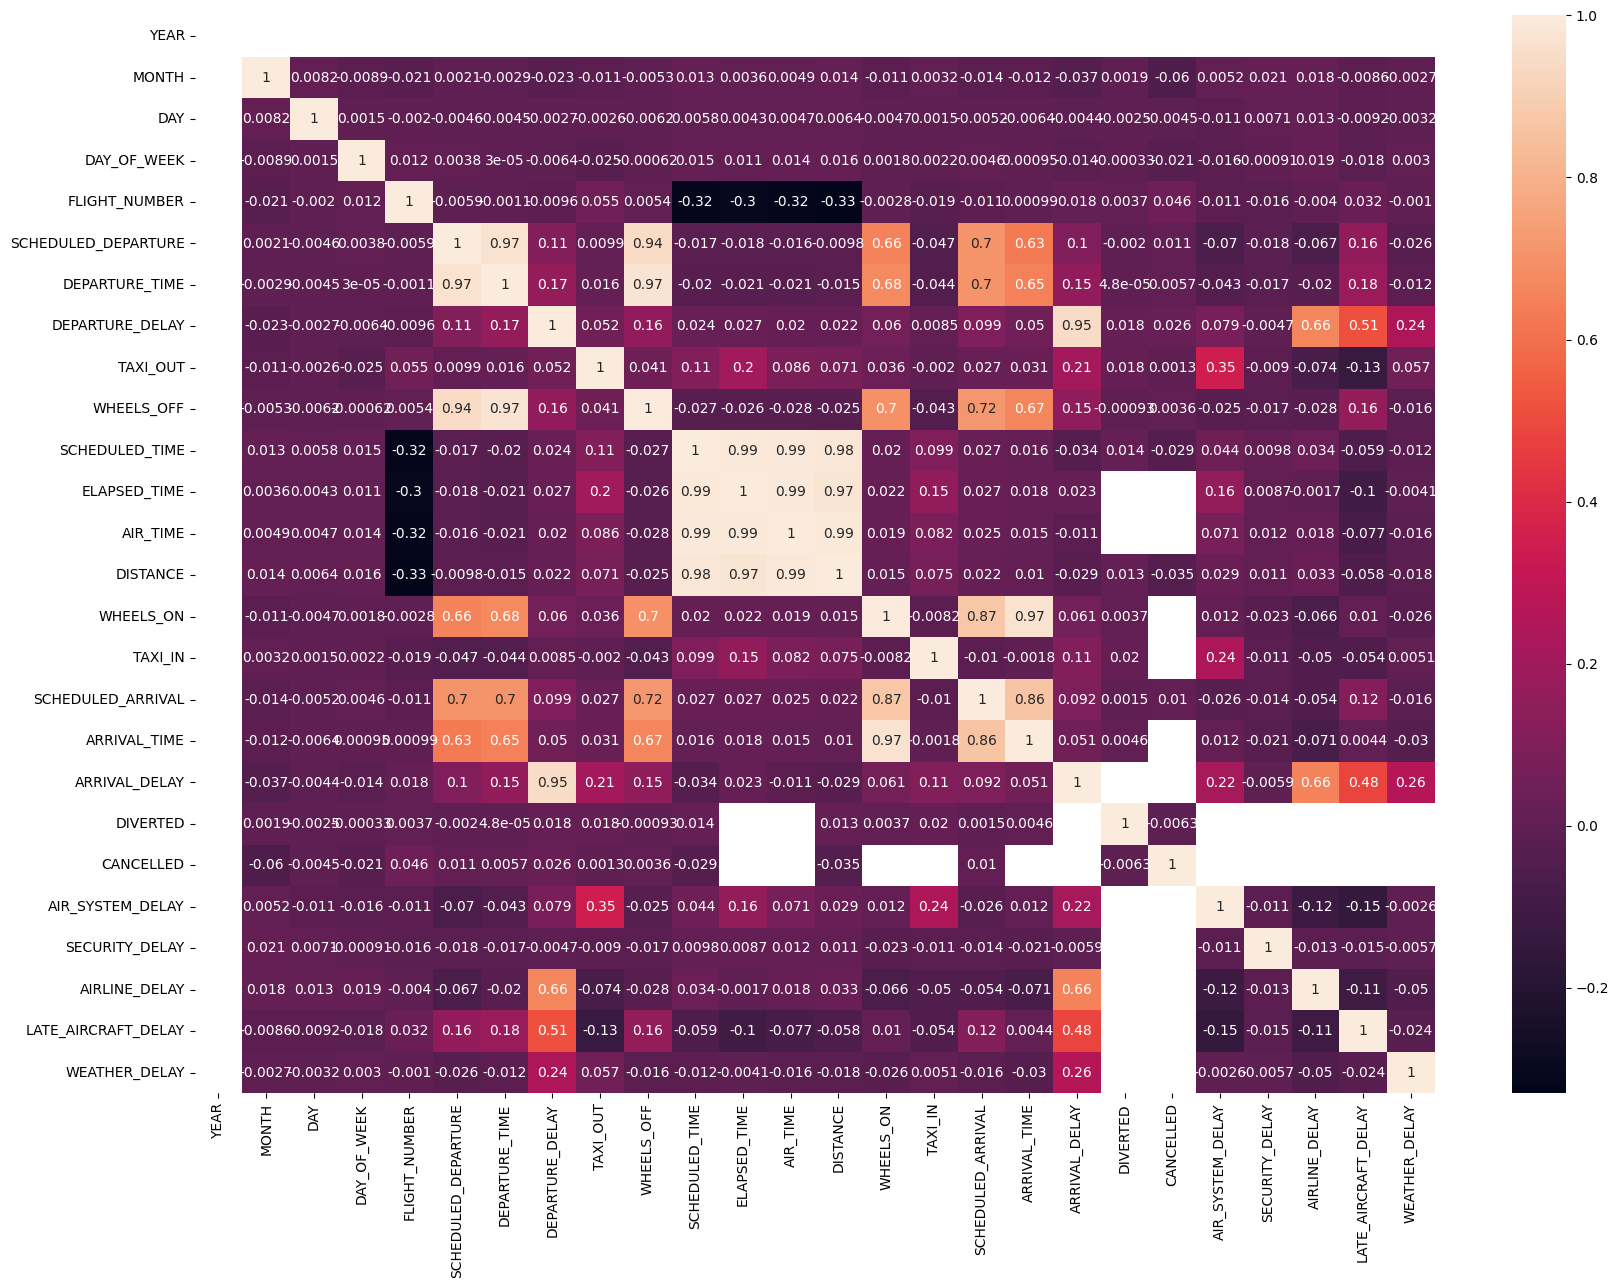

In [ ]:
axis = plt.subplots(figsize=(20,14))
sns.heatmap(flights.corr(),annot = True)
plt.show()

In [ ]:
#Very High Correlation Between Arrival Delay and Departure Delay¶

#It shows that maximum of the Arrival Delays are due to the Departure Delays.

In [ ]:
corr=flights.corr()
corr

<ipython-input-12-90fc44020515>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=flights.corr()


,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH,NaN,1.000000,0.008240,-0.008943,-0.020876,0.002097,-0.002929,-0.022816,-0.011250,-0.005282,...,-0.014391,-0.011850,-0.036727,0.001906,-0.059821,0.005196,0.021040,0.017590,-0.008625,-0.002665
DAY,NaN,0.008240,1.000000,0.001505,-0.002019,-0.004643,-0.004456,-0.002735,-0.002587,-0.006175,...,-0.005151,-0.006365,-0.004439,-0.002464,-0.004454,-0.010775,0.007141,0.012835,-0.009151,-0.003183
DAY_OF_WEEK,NaN,-0.008943,0.001505,1.000000,0.011869,0.003837,0.000030,-0.006442,-0.025230,-0.000620,...,0.004555,0.000953,-0.013565,-0.000335,-0.020982,-0.016379,-0.000913,0.018954,-0.017523,0.002988
FLIGHT_NUMBER,NaN,-0.020876,-0.002019,0.011869,1.000000,-0.005931,-0.001131,-0.009557,0.054829,0.005354,...,-0.011307,0.000993,0.017611,0.003679,0.045667,-0.010585,-0.015631,-0.003952,0.031726,-0.001047
SCHEDULED_DEPARTURE,NaN,0.002097,-0.004643,0.003837,-0.005931,1.000000,0.965831,0.109938,0.009911,0.941041,...,0.704602,0.629391,0.100721,-0.001959,0.010658,-0.069757,-0.018422,-0.067167,0.155995,-0.025928
DEPARTURE_TIME,NaN,-0.002929,-0.004456,0.000030,-0.001131,0.965831,1.000000,0.166167,0.015944,0.972685,...,0.704396,0.647295,0.154664,0.000048,0.005659,-0.042789,-0.017245,-0.020419,0.182599,-0.011549
DEPARTURE_DELAY,NaN,-0.022816,-0.002735,-0.006442,-0.009557,0.109938,0.166167,1.000000,0.052288,0.157234,...,0.099295,0.049637,0.947276,0.017946,0.025719,0.078939,-0.004695,0.663676,0.514926,0.238503
TAXI_OUT,NaN,-0.011250,-0.002587,-0.025230,0.054829,0.009911,0.015944,0.052288,1.000000,0.040892,...,0.027075,0.031480,0.214842,0.018443,0.001252,0.347832,-0.008954,-0.073682,-0.132645,0.057039
WHEELS_OFF,NaN,-0.005282,-0.006175,-0.000620,0.005354,0.941041,0.972685,0.157234,0.040892,1.000000,...,0.715629,0.666509,0.150983,-0.000927,0.003587,-0.024880,-0.016648,-0.028479,0.159106,-0.016302


In [ ]:
variables_to_remove=["YEAR","FLIGHT_NUMBER","TAIL_NUMBER","DEPARTURE_TIME","TAXI_OUT","WHEELS_OFF","ELAPSED_TIME","AIR_TIME","WHEELS_ON","TAXI_IN","ARRIVAL_TIME","DIVERTED","CANCELLED","CANCELLATION_REASON","AIR_SYSTEM_DELAY", "SECURITY_DELAY","AIRLINE_DELAY","LATE_AIRCRAFT_DELAY","WEATHER_DELAY","SCHEDULED_TIME","SCHEDULED_ARRIVAL"]
flights.drop(variables_to_remove,axis=1,inplace= True)
flights.columns

Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY',
       'DISTANCE', 'ARRIVAL_DELAY'],
      dtype='object')

In [ ]:
airport = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/airports.csv')
airport

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
...,...,...,...,...,...,...,...
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023


In [ ]:
flights.loc[~flights.ORIGIN_AIRPORT.isin(airport.IATA_CODE.values),'ORIGIN_AIRPORT']='OTHER'
flights.loc[~flights.DESTINATION_AIRPORT.isin(airport.IATA_CODE.values),'DESTINATION_AIRPORT']='OTHER'
flights

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY
4938541,11,5,4,B6,FLL,JAX,720,-6.0,319,-12.0
1215173,3,20,5,WN,MDW,ATL,1200,1.0,591,-10.0
1748817,4,22,3,B6,FLL,JFK,1130,11.0,1069,-6.0
3053856,7,10,5,AA,LAX,BOS,2130,-6.0,2611,-30.0
5669461,12,22,2,MQ,CRP,DFW,800,-1.0,354,0.0
...,...,...,...,...,...,...,...,...,...,...
861645,2,26,4,OO,DSM,DEN,1328,48.0,589,43.0
121662,1,8,4,EV,PVD,ORD,1708,NaN,849,NaN
5482129,12,10,4,AA,ORD,DFW,835,8.0,802,-11.0
2415925,6,2,2,OO,SAT,LAX,1819,-10.0,1211,-20.0


In [ ]:
print(flights.ORIGIN_AIRPORT.nunique())
print(flights.DESTINATION_AIRPORT.nunique())
print(flights.AIRLINE.nunique())

320
323
14


In [ ]:
flights=flights.dropna()
flights

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY
4938541,11,5,4,B6,FLL,JAX,720,-6.0,319,-12.0
1215173,3,20,5,WN,MDW,ATL,1200,1.0,591,-10.0
1748817,4,22,3,B6,FLL,JFK,1130,11.0,1069,-6.0
3053856,7,10,5,AA,LAX,BOS,2130,-6.0,2611,-30.0
5669461,12,22,2,MQ,CRP,DFW,800,-1.0,354,0.0
...,...,...,...,...,...,...,...,...,...,...
4075404,9,11,5,UA,EWR,IAH,629,-5.0,1400,11.0
861645,2,26,4,OO,DSM,DEN,1328,48.0,589,43.0
5482129,12,10,4,AA,ORD,DFW,835,8.0,802,-11.0
2415925,6,2,2,OO,SAT,LAX,1819,-10.0,1211,-20.0


In [ ]:
flights.shape

(98205, 10)

In [ ]:
df=pd.DataFrame(flights)
df['DAY_OF_WEEK']= df['DAY_OF_WEEK'].apply(str)
df["DAY_OF_WEEK"].replace({"1":"SUNDAY", "2": "MONDAY", "3": "TUESDAY", "4":"WEDNESDAY", "5":"THURSDAY", "6":"FRIDAY", "7":"SATURDAY"},inplace=True)
flights

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY
4938541,11,5,WEDNESDAY,B6,FLL,JAX,720,-6.0,319,-12.0
1215173,3,20,THURSDAY,WN,MDW,ATL,1200,1.0,591,-10.0
1748817,4,22,TUESDAY,B6,FLL,JFK,1130,11.0,1069,-6.0
3053856,7,10,THURSDAY,AA,LAX,BOS,2130,-6.0,2611,-30.0
5669461,12,22,MONDAY,MQ,CRP,DFW,800,-1.0,354,0.0
...,...,...,...,...,...,...,...,...,...,...
4075404,9,11,THURSDAY,UA,EWR,IAH,629,-5.0,1400,11.0
861645,2,26,WEDNESDAY,OO,DSM,DEN,1328,48.0,589,43.0
5482129,12,10,WEDNESDAY,AA,ORD,DFW,835,8.0,802,-11.0
2415925,6,2,MONDAY,OO,SAT,LAX,1819,-10.0,1211,-20.0


In [ ]:
dums = ['AIRLINE','ORIGIN_AIRPORT','DESTINATION_AIRPORT','DAY_OF_WEEK']
df_cat=pd.get_dummies(df[dums],drop_first=True)
df_cat

,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,AIRLINE_F9,AIRLINE_HA,AIRLINE_MQ,AIRLINE_NK,AIRLINE_OO,AIRLINE_UA,...,DESTINATION_AIRPORT_WYS,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM,DAY_OF_WEEK_MONDAY,DAY_OF_WEEK_SATURDAY,DAY_OF_WEEK_SUNDAY,DAY_OF_WEEK_THURSDAY,DAY_OF_WEEK_TUESDAY,DAY_OF_WEEK_WEDNESDAY
4938541,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1215173,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1748817,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3053856,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5669461,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4075404,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
861645,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
5482129,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2415925,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
df_cat.columns


Index(['AIRLINE_AS', 'AIRLINE_B6', 'AIRLINE_DL', 'AIRLINE_EV', 'AIRLINE_F9',
       'AIRLINE_HA', 'AIRLINE_MQ', 'AIRLINE_NK', 'AIRLINE_OO', 'AIRLINE_UA',
       ...
       'DESTINATION_AIRPORT_WYS', 'DESTINATION_AIRPORT_XNA',
       'DESTINATION_AIRPORT_YAK', 'DESTINATION_AIRPORT_YUM',
       'DAY_OF_WEEK_MONDAY', 'DAY_OF_WEEK_SATURDAY', 'DAY_OF_WEEK_SUNDAY',
       'DAY_OF_WEEK_THURSDAY', 'DAY_OF_WEEK_TUESDAY', 'DAY_OF_WEEK_WEDNESDAY'],
      dtype='object', length=660)

In [ ]:
df.columns

Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY',
       'DISTANCE', 'ARRIVAL_DELAY'],
      dtype='object')

In [ ]:
flights.columns

Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY',
       'DISTANCE', 'ARRIVAL_DELAY'],
      dtype='object')

In [ ]:
var_to_remove=["DAY_OF_WEEK","AIRLINE","ORIGIN_AIRPORT","DESTINATION_AIRPORT"]
df.drop(var_to_remove,axis=1,inplace=True)
df


,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY
4938541,11,5,720,-6.0,319,-12.0
1215173,3,20,1200,1.0,591,-10.0
1748817,4,22,1130,11.0,1069,-6.0
3053856,7,10,2130,-6.0,2611,-30.0
5669461,12,22,800,-1.0,354,0.0
...,...,...,...,...,...,...
4075404,9,11,629,-5.0,1400,11.0
861645,2,26,1328,48.0,589,43.0
5482129,12,10,835,8.0,802,-11.0
2415925,6,2,1819,-10.0,1211,-20.0


In [ ]:
data=pd.concat([df,df_cat],axis=1)
data

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,...,DESTINATION_AIRPORT_WYS,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM,DAY_OF_WEEK_MONDAY,DAY_OF_WEEK_SATURDAY,DAY_OF_WEEK_SUNDAY,DAY_OF_WEEK_THURSDAY,DAY_OF_WEEK_TUESDAY,DAY_OF_WEEK_WEDNESDAY
4938541,11,5,720,-6.0,319,-12.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1215173,3,20,1200,1.0,591,-10.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1748817,4,22,1130,11.0,1069,-6.0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3053856,7,10,2130,-6.0,2611,-30.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5669461,12,22,800,-1.0,354,0.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4075404,9,11,629,-5.0,1400,11.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
861645,2,26,1328,48.0,589,43.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5482129,12,10,835,8.0,802,-11.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2415925,6,2,1819,-10.0,1211,-20.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
data.shape

(98205, 666)

In [ ]:
final_data = data.sample(n=60000)
final_data

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,...,DESTINATION_AIRPORT_WYS,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM,DAY_OF_WEEK_MONDAY,DAY_OF_WEEK_SATURDAY,DAY_OF_WEEK_SUNDAY,DAY_OF_WEEK_THURSDAY,DAY_OF_WEEK_TUESDAY,DAY_OF_WEEK_WEDNESDAY
3626625,8,13,1918,10.0,226,-8.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4229636,9,21,725,6.0,1197,-7.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2525442,6,9,1126,9.0,1346,-5.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4369231,9,29,2230,0.0,129,15.0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1274104,3,24,655,3.0,325,-1.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134467,3,15,1513,12.0,432,-4.0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2742639,6,22,955,-1.0,920,-16.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2097240,5,13,2140,-2.0,895,-11.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3427270,8,2,730,-2.0,2072,-21.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
final_data.shape

(60000, 666)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
X=final_data.drop("DEPARTURE_DELAY",axis=1)
Y=final_data.DEPARTURE_DELAY

In [ ]:
X

,MONTH,DAY,SCHEDULED_DEPARTURE,DISTANCE,ARRIVAL_DELAY,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,AIRLINE_F9,...,DESTINATION_AIRPORT_WYS,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM,DAY_OF_WEEK_MONDAY,DAY_OF_WEEK_SATURDAY,DAY_OF_WEEK_SUNDAY,DAY_OF_WEEK_THURSDAY,DAY_OF_WEEK_TUESDAY,DAY_OF_WEEK_WEDNESDAY
3626625,8,13,1918,226,-8.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4229636,9,21,725,1197,-7.0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2525442,6,9,1126,1346,-5.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4369231,9,29,2230,129,15.0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1274104,3,24,655,325,-1.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134467,3,15,1513,432,-4.0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2742639,6,22,955,920,-16.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2097240,5,13,2140,895,-11.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3427270,8,2,730,2072,-21.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
Y

3626625    10.0
4229636     6.0
2525442     9.0
4369231     0.0
1274104     3.0
           ... 
1134467    12.0
2742639    -1.0
2097240    -2.0
3427270    -2.0
1383349    -5.0
Name: DEPARTURE_DELAY, Length: 60000, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred = reg_rf.predict(X_test)

In [ ]:
reg_rf.score(X_train,y_train)

0.9899354208867567

In [ ]:
reg_rf.score(X_test,y_test)

0.9261528132008665

In [ ]:
metrics.r2_score(y_test,y_pred)

0.9261528132008665

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 5.958464166666667
MSE: 94.74050870833332
RMSE: 9.733473619850898


In [ ]:
pp=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
pp

,Actual,Predicted
231507,10.0,5.07
2942753,4.0,3.69
5433420,-5.0,-3.91
1941304,-5.0,-1.16
1037474,0.0,-0.99
...,...,...
2797161,83.0,76.56
4797160,2.0,-1.02
3459525,4.0,-5.12
4901538,-1.0,-1.78


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [ ]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [ ]:
# Random search of parameters, using 5 fold cross validation,search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [ ]:

rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=148; total time=   9.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=148; total time=   6.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=148; total time=   7.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=148; total time=   6.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=148; total time=   7.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=182; total time=  13.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=182; total time=  12.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=44; total time=  50.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=44; total time=  51.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=44; total time=  51.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=44; total time=  51.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=44; total time=  52.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=61; total time= 1.3min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=61; total time= 1.3min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=61; total time= 1.2min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=61; total time= 1.2min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=61; total time= 1.3min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=113; total time= 2.4min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=113; total time= 2.4min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=113; total time= 2.4min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=113; total time= 2.4min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=113; total time= 2.4min
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=165; total time=  24.4s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=165; total time=  24.2s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=165; total time=  24.5s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=165; total time=  23.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=165; total time=  24.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=182; total time=   5.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=182; total time=   3.8s
[CV] END max_depth=5, max_features=sq

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=113; total time= 2.6min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=113; total time= 2.6min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=113; total time= 2.6min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=113; total time= 2.7min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=113; total time= 2.6min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [10, 27, 44, 61, 79, 96,
                                                         113, 130, 148, 165,
                                                         182, 200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
rf_random.best_params_

{'n_estimators': 61,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 15}

In [ ]:
p=rf_random.predict(X_test)

In [ ]:
metrics.r2_score(y_test,p)

0.9280323232483016

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test,p))
print('MSE:', metrics.mean_squared_error(y_test,p))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,p)))

MAE: 5.931129039597461
MSE: 92.32923556802027
RMSE: 9.608810309711616


In [ ]:
zz=pd.DataFrame({'Actual':y_test,'Predicted':p})
zz

,Actual,Predicted
231507,10.0,7.216894
2942753,4.0,6.193399
5433420,-5.0,-4.058734
1941304,-5.0,-0.971583
1037474,0.0,-0.430142
...,...,...
2797161,83.0,75.012671
4797160,2.0,0.759607
3459525,4.0,-4.700002
4901538,-1.0,-1.688856


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(random_state=0)

In [ ]:
GBR=gbr.fit(X_train,y_train)
pre=GBR.predict(X_test)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test,pre))
print('MSE:', metrics.mean_squared_error(y_test,pre))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,pre)))

MAE: 5.922248467054646
MSE: 90.59188906635883
RMSE: 9.517977152019164


In [ ]:
metrics.r2_score(y_test,pre)

0.9293865291037715

In [ ]:
gg=pd.DataFrame({'Actual':y_test,'Predicted':pre})
gg

,Actual,Predicted
231507,10.0,6.444587
2942753,4.0,3.604754
5433420,-5.0,-4.096217
1941304,-5.0,-2.382484
1037474,0.0,-0.576163
...,...,...
2797161,83.0,71.560312
4797160,2.0,1.006969
3459525,4.0,-5.142104
4901538,-1.0,-1.755032


In [ ]:
def predict(MONTH, DAY,SCHEDULED_DEPARTURE,DISTANCE, ARRIVAL_DELAY,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DAY_OF_WEEK):
    AIRLINE_index = np.where(X.columns==AIRLINE)[0][0]
    ORIGIN_index = np.where(X.columns==ORIGIN_AIRPORT)[0][0]
    DESTINATION_index = np.where(X.columns==DESTINATION_AIRPORT)[0][0]
    DAY_OF_WEEK_index = np.where(X.columns==DAY_OF_WEEK)[0][0]
    x= np.zeros(len(X.columns))
    x[0] = MONTH
    x[1] = DAY
    x[2] = SCHEDULED_DEPARTURE
    x[3] = DISTANCE
    x[4] = ARRIVAL_DELAY
    if AIRLINE_index >=0:
        x[AIRLINE_index] = 1
    if ORIGIN_index >=0:
        x[ORIGIN_index] = 1
    if DESTINATION_index >=0:
        x[DESTINATION_index] = 1
    if  DAY_OF_WEEK_index >= 0:
        x[ DAY_OF_WEEK_index] = 1

    return gbr.predict([x])[0]

In [ ]:
res= predict(5,6,1515,328,-8.0,'AIRLINE_OO','ORIGIN_AIRPORT_PHX','DESTINATION_AIRPORT_ABQ','DAY_OF_WEEK_TUESDAY')
res

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


-3.694608295675738

In [ ]:
if(res<=-15):
  print("Flight is delayed")
else:
  print("Flight is not delayed")

In [ ]:
***********************************************************OVER****************************************************************************************
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^